In [ ]:
from google.colab import files
uploaded = files.upload()


Saving expedia-hotel-recommendations.zip to expedia-hotel-recommendations.zip


In [ ]:
import zipfile
import os

zip_file = "expedia-hotel-recommendations.zip"

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall("expedia_data")


os.listdir("expedia_data")


['destinations.csv', 'train.csv', 'sample_submission.csv', 'test.csv']

In [ ]:
import pandas as pd

# Load a sample only (adjust rows if needed)
df = pd.read_csv("expedia_data/train.csv", nrows=100000)
df.head()


,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,0,1,14984,1,0,1,2,50,1457,21


In [ ]:
cols = ['date_time', 'site_name', 'posa_continent', 'user_location_country',
        'user_location_region', 'user_location_city', 'is_mobile',
        'is_package', 'channel', 'srch_destination_id', 'hotel_cluster']
df = pd.read_csv("expedia_data/train.csv", nrows=100000, usecols=cols)


In [ ]:
X = df.drop('hotel_cluster', axis=1)
y = df['hotel_cluster']


In [ ]:
# Check first few rows
df.head()


,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,is_mobile,is_package,channel,srch_destination_id,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,0,1,9,8250,1
1,2014-08-11 08:22:12,2,3,66,348,48862,0,1,9,8250,1
2,2014-08-11 08:24:33,2,3,66,348,48862,0,0,9,8250,1
3,2014-08-09 18:05:16,2,3,66,442,35390,0,0,3,14984,80
4,2014-08-09 18:08:18,2,3,66,442,35390,0,0,3,14984,21


In [ ]:
# Drop 'date_time'
df = df.drop('date_time', axis=1)

# Fill missing values with -1
df = df.fillna(-1)

# Confirm all are numeric
df.dtypes


,0
site_name,int64
posa_continent,int64
user_location_country,int64
user_location_region,int64
user_location_city,int64
is_mobile,int64
is_package,int64
channel,int64
srch_destination_id,int64
hotel_cluster,int64


In [ ]:
# Feature matrix and target vector
X = df.drop('hotel_cluster', axis=1)
y = df['hotel_cluster']


In [ ]:
from sklearn.model_selection import train_test_split

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")


Test Accuracy: 0.2927


In [ ]:
import numpy as np
from sklearn.metrics import top_k_accuracy_score

# Predict probabilities
y_probs = model.predict_proba(X_test)

# Top-5 accuracy
top5_acc = top_k_accuracy_score(y_test, y_probs, k=5)
print(f"Top-5 Accuracy: {top5_acc:.4f}")


Top-5 Accuracy: 0.5322


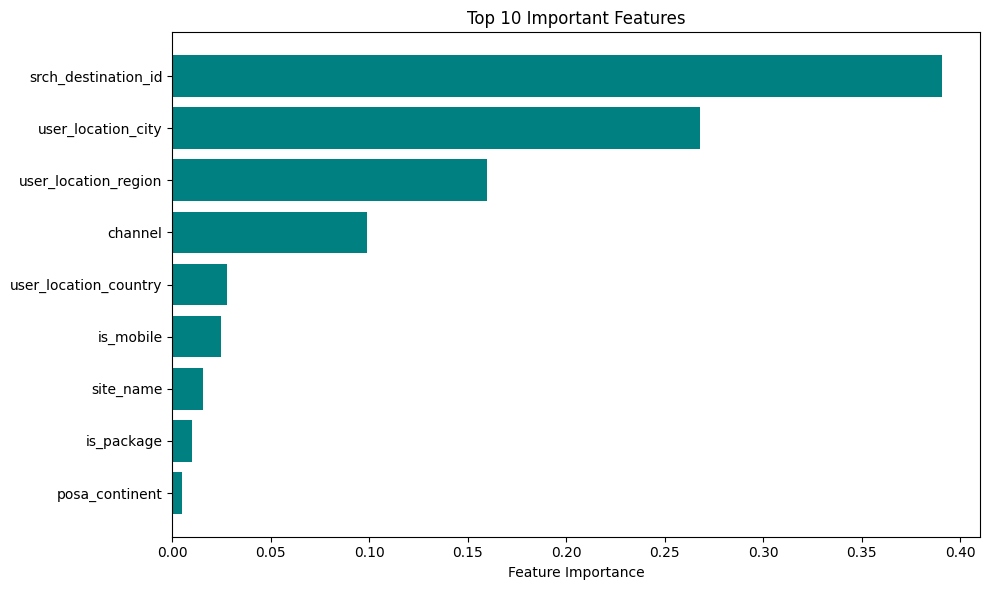

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances
importances = model.feature_importances_
features = X.columns

# Plot top 10
indices = np.argsort(importances)[-10:]
plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], color='teal', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Feature Importance")
plt.title("Top 10 Important Features")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(
    max_iter=1000,
    multi_class='multinomial',
    solver='saga',         # fast and scalable
    n_jobs=-1,             # parallel computation
    verbose=1              # show progress
)
log_model.fit(X_train, y_train)

# Evaluate
log_acc = log_model.score(X_test, y_test)
print(f"Logistic Regression Accuracy: {log_acc:.4f}")


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


max_iter reached after 711 seconds
Logistic Regression Accuracy: 0.0306


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [1]:

!pip install xgboost


In [2]:

import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
